Những tasks cần làm được đánh dấu bằng Markdown
Dữ liệu cần xử lý (thô): jobs_data.csv
Dữ liệu đã xử lý qua 1 tý : cleaned.csv
Dữ liệu B (dành cho trường hợp xử lý bên A không được): jobs_data_extracted_2.csv (không được sửa, đây là file cũ t làm nhưng xóa rồi)
Làm việc chính với cột Salary, không phải (Max Salary), (Min Salary)

In [6]:
import requests
import pandas as pd

# URL của API
url = "https://jsearch.p.rapidapi.com/search"

# Tham số truy vấn
querystring = {
    "query":" developer",  
    "page": "1",  
    "country": "us", 
    "date_posted": "all"  
}


headers = {
    "x-rapidapi-key": "ae3c3e2a3bmsh004bd7ff719d4e1p1bc770jsnb14e370b91f8",  # API key của bạn
    "x-rapidapi-host": "jsearch.p.rapidapi.com"
}

# Danh sách lưu trữ dữ liệu công việc
jobs_list = []


page = 1
max_pages = 60

while page <= max_pages:
    
    querystring["page"] = str(page)

    response = requests.get(url, headers=headers, params=querystring)
    
    print(f"Trang {page} - Status Code: {response.status_code}")

    if response.status_code == 200:
        data = response.json() 
        print(f"Response JSON - Page {page}:", data)  
        print("Request Parameters:", data.get("parameters", {}))
        jobs_data = data.get("data", [])
        
        if jobs_data:
            print(f"Số lượng công việc: {len(jobs_data)}")
            for job in jobs_data:
                # Lấy thông tin công việc và thêm vào danh sách
                jobs_list.append({
                    "Job Title": job.get('job_title', 'Not Available'),
                    "Job Score": job.get('job_apply_quality_score','Not Available'),
                    "Job Experience Required": job.get('required_experience_in_months', 'Not Available'), 
                    "Postgraduate degree": job.get('postgraduate_degree',False),
                    "Job Skills Required": job.get('Qualifications','Not Available'),
                    "Job Location": f"{job.get('job_city', 'Not Available')} {job.get('job_state', 'Not Available')} {job.get('job_country', 'Not Available')}",
                    "Job Description": job.get('job_description', 'Not Available'),
                    "Job Min Salary": job.get('job_min_salary', 'Not Available'),
                    "Job Max Salary": job.get('job_max_salary', 'Not Available'),
                    "Year": job.get('job_posted_at_datetime_utc')
                })
        else:
            print("Không có công việc nào trong phản hồi.")
    else:
        print(f"Lỗi khi tải dữ liệu từ API: {response.status_code}")
        print(f"Chi tiết lỗi: {response.text}")
   
    page += 1

if jobs_list:
    # Chuyển dữ liệu thành DataFrame
    df = pd.DataFrame(jobs_list)
    
    # Lưu DataFrame vào file CSV
    df.to_csv('jobs_data.csv', index=False, encoding='utf-8')
    print(f"Dữ liệu đã được lưu vào file jobs_data.csv.")
else:
    print("Không có dữ liệu để lưu.")


Trang 1 - Status Code: 200
Response JSON - Page 1: {'status': 'OK', 'request_id': '502d7177-ea31-4e61-a0c1-33d969b95cff', 'parameters': {'query': 'developer', 'page': 1, 'num_pages': 1, 'date_posted': 'all', 'country': 'us', 'language': 'en'}, 'data': [{'job_id': 'mUyBEGFxEucJl-K7AAAAAA==', 'employer_name': 'Artech Information Systems', 'employer_logo': None, 'employer_website': 'https://www.artech.com', 'employer_company_type': None, 'employer_linkedin': None, 'job_publisher': 'Clearance Jobs', 'job_employment_type': 'CONTRACTOR', 'job_employment_types': ['CONTRACTOR', 'CONTRACTOR'], 'job_employment_type_text': 'Contractor', 'job_title': '.Net Developer Jobs', 'job_apply_link': 'https://www.clearancejobs.com/jobs/8067331/net-developer?utm_campaign=google_jobs_apply&utm_source=google_jobs_apply&utm_medium=organic', 'job_apply_is_direct': True, 'job_apply_quality_score': None, 'apply_options': [{'publisher': 'Clearance Jobs', 'apply_link': 'https://www.clearancejobs.com/jobs/8067331/net

Extract năm kinh nghiệm, kỹ năng cần có

In [3]:
import pandas as pd
import re

In [116]:
df = pd.read_csv('jobs_data.csv')
df

Job Title  Job Score  \
0                                  .Net Developer Jobs        NaN   
1                                       .NET Developer        NaN   
2                          MS Power Platform Developer        NaN   
3                            Data Developer/ Team Lead        NaN   
4                   CBT Developer w active TS/SCI Poly        NaN   
..                                                 ...        ...   
432  SOFTWARE DEVELOPER (CTV) - (Bright Script/Reac...        NaN   
433                                     Java Developer        NaN   
434         Website Developer (.60-1.0 FTE) #2025-38A5        NaN   
435                    Junior Level Software Developer        NaN   
436                                      Web Developer        NaN   

    Job Experience Required  Postgraduate degree Job Skills Required  \
0             Not Available                False       Not Available   
1             Not Available                False       Not Available   
2             Not Available                False       Not Available   
3             Not Available                False       Not Available   
4             Not Available                False       Not Available   
..                      ...                  ...                 ...   
432           Not Available                False       Not Available   
433           Not Available                False       Not Available   
434           Not Available                False       Not Available   
435           Not Available                False       Not Available   
436           Not Available                False       Not Available   

    Job Location                                    Job Description  \
0     None DC US  Client is seeking a senior-mid level .Net deve...   
1     None VA US  As the .NET Developer you will be apart of a t...   
2     None VA US  Description\n\nLeidos currently has an opening...   
3     None DC US  Required Qualifications:\n• 5 years with BS/BA...   
4     None MD US  Description\n\nLooking for a rewarding career ...   
..           ...                                                ...   
432   None GA US  About Gray Media:\n\nGray Media is a leading m...   
433   None MI US  About Us\n\nSynergistic IT is a full-service s...   
434   None NY US  Application Deadline\n\nDecember 13, 2024 (or ...   
435   None TX US  Since 2010 SynergisticIT has helped Jobseekers...   
436   None LA US  Please note that this position is based on our...   

     Job Min Salary  Job Max Salary                      Year  
0               NaN             NaN  2024-11-22T00:00:00.000Z  
1               NaN             NaN                       NaN  
2               NaN             NaN  2024-11-21T00:00:00.000Z  
3               NaN             NaN  2024-10-23T00:00:00.000Z  
4               NaN             NaN  2024-11-21T00:00:00.000Z  
..              ...             ...                       ...  
432             NaN             NaN                       NaN  
433             NaN             NaN                       NaN  
434             NaN             NaN  2024-11-15T00:00:00.000Z  
435             NaN             NaN                       NaN  
436             NaN             NaN  2024-11-15T00:00:00.000Z  

[437 rows x 10 columns]

In [121]:
df = df.drop_duplicates()

                                             Job Title  Salary
0                                  .Net Developer Jobs     NaN
1                                       .NET Developer     NaN
3                            Data Developer/ Team Lead     NaN
6                            Expert Software Developer     NaN
13                               Application Developer     NaN
..                                                 ...     ...
432  SOFTWARE DEVELOPER (CTV) - (Bright Script/Reac...     NaN
433                                     Java Developer     NaN
434         Website Developer (.60-1.0 FTE) #2025-38A5     NaN
435                    Junior Level Software Developer     NaN
436                                      Web Developer     NaN

[222 rows x 2 columns]


<>:39: SyntaxWarning: invalid escape sequence '\$'
<>:39: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Admin\AppData\Local\Temp\ipykernel_13904\2864670202.py:39: SyntaxWarning: invalid escape sequence '\$'
  df['Salary'] = df['Salary'].replace({'\$': '', ',': '', 'k': '000'}, regex=True)


In [118]:
df = df.drop('Job Max Salary',axis =1)
df = df.drop('Job Min Salary',axis =1)

In [119]:
df['Salary']

0          NaN
1          NaN
2      81250.0
3          NaN
4      78000.0
        ...   
432        NaN
433        NaN
434        NaN
435        NaN
436        NaN
Name: Salary, Length: 437, dtype: float64

Chuẩn hóa cột Salary

Xử lý salary (nhập tay) không extract được

In [32]:
df.dtypes

Job Title                   object
Job Score                  float64
Job Experience Required     object
Postgraduate degree           bool
Job Skills Required         object
Job Location                object
Job Description             object
Year                        object
Salary                     float64
Experience                  object
dtype: object

Xử lý những dữ liệu bất thường/ không extract được

In [122]:
df[df['Salary'] < 10]

Job Title  Job Score Job Experience Required  \
69               API Developer        NaN           Not Available   
152  IT Developer - Dublin, CA        NaN           Not Available   

     Postgraduate degree Job Skills Required Job Location  \
69                 False       Not Available   None GA US   
152                False       Not Available   None CA US   

                                       Job Description  \
69   Position Title: API Developer\n\nlocation: Alp...   
152  About Us\n\nThe Save Mart Companies operates 1...   

                         Year  Salary Experience  
69   2024-11-19T00:00:00.000Z     3.0   3+ years  
152  2024-11-09T00:00:00.000Z     5.0   70 years

$70,000.00 - $75,000.00 /per year
dòng 389 lương là  $115,764.00 - 119,017.00


In [123]:
df['Salary'][152] = (70000+75000)/2
df['Salary'][69] = (115764+119017)/2

C:\Users\Admin\AppData\Local\Temp\ipykernel_13904\571119086.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Salary'][152] = (70000+75000)/2
C:\Users\Admin\AppData\Local\Temp\ipykernel_13904\571119086.py:2: FutureWarning: ChainedAssig

Giả sử mỗi tuần họ làm việc bao nhiêu giờ ?

In [124]:
df['Job Title']

0                                    .Net Developer Jobs
1                                         .NET Developer
2                            MS Power Platform Developer
3                              Data Developer/ Team Lead
4                     CBT Developer w active TS/SCI Poly
                             ...                        
409    C#.NET Developer w/ React Exp (Mid-Sr) - Remot...
410                             Web Developer I - 525281
416    Adjunct Faculty Non-Instructional Course Devel...
418    Developer in Test II - Core Enterprise Data an...
419                             UI Developer - Plano, TX
Name: Job Title, Length: 212, dtype: object

In [39]:
keywords = {
    'Frontend Development': ['Frontend Web Developer', 'Frontend Developer', 'Web/Frontend Developer'],
    'Web Development': ['Full Stack Web Developer', 'Web Developer', 'Web', 'Website'],
    'Software Development': ['Python Developer', 'Java Developer', 'Full Stack Developer','Software'],
    'Data Science': ['Data Scientist', 'Machine Learning', 'Data'],
    'DevOps': ['DevOps']
}

sorted_keywords = {
    group: sorted(terms, key=len, reverse=True) for group, terms in keywords.items()
}

def classify_job_title(job_title):
    job_title = job_title.lower() 
    for group, terms in sorted_keywords.items():
        for term in terms:
            if term.lower() in job_title:  
                return group
    return 'Software Development' 
df['Job Group'] = df['Job Title'].apply(classify_job_title)


In [126]:
df['Job Group'].unique()

array(['Other', 'Data Science', 'Software Development', 'Web Development',
       'Frontend Development', 'DevOps'], dtype=object)

In [127]:
import re

In [129]:
df.loc[df['Salary'] <= 500, 'Salary'] = df[df['Salary'] <= 500]['Salary'] * 2000

In [131]:
df['Experience'] = df['Experience'].apply(lambda x: int(re.findall(r'\d+', str(x))[0]) if re.findall(r'\d+', str(x)) else 0)


In [132]:
df

Job Title  Job Score  \
0                                  .Net Developer Jobs        NaN   
1                                       .NET Developer        NaN   
2                          MS Power Platform Developer        NaN   
3                            Data Developer/ Team Lead        NaN   
4                   CBT Developer w active TS/SCI Poly        NaN   
..                                                 ...        ...   
409  C#.NET Developer w/ React Exp (Mid-Sr) - Remot...        NaN   
410                           Web Developer I - 525281        NaN   
416  Adjunct Faculty Non-Instructional Course Devel...        NaN   
418  Developer in Test II - Core Enterprise Data an...        NaN   
419                           UI Developer - Plano, TX        NaN   

    Job Experience Required  Postgraduate degree Job Skills Required  \
0             Not Available                False       Not Available   
1             Not Available                False       Not Available   
2             Not Available                False       Not Available   
3             Not Available                False       Not Available   
4             Not Available                False       Not Available   
..                      ...                  ...                 ...   
409           Not Available                False       Not Available   
410           Not Available                False       Not Available   
416           Not Available                False       Not Available   
418           Not Available                False       Not Available   
419           Not Available                False       Not Available   

    Job Location                                    Job Description  \
0     None DC US  Client is seeking a senior-mid level .Net deve...   
1     None VA US  As the .NET Developer you will be apart of a t...   
2     None VA US  Description\n\nLeidos currently has an opening...   
3     None DC US  Required Qualifications:\n• 5 years with BS/BA...   
4     None MD US  Description\n\nLooking for a rewarding career ...   
..           ...                                                ...   
409   None PA US  As the largest online distributor of restauran...   
410   None AL US  Pay Grade/Pay Range: Minimum: $48,600 - Midpoi...   
416   None CA US  Adjunct Faculty Non-Instructional Course Devel...   
418   None WA US  Company Description\n\n“We’re not in the shipp...   
419   None TX US  Position : UI Developer\nLocation : Plano, TX\...   

                         Year    Salary  Experience        Job Group  
0    2024-11-22T00:00:00.000Z       NaN           6            Other  
1                         NaN       NaN           0            Other  
2    2024-11-21T00:00:00.000Z   81250.0           4            Other  
3    2024-10-23T00:00:00.000Z       NaN           5     Data Science  
4    2024-11-21T00:00:00.000Z   78000.0           8            Other  
..                        ...       ...         ...              ...  
409  2024-11-11T00:00:00.000Z       NaN           4            Other  
410  2024-11-17T00:00:00.000Z   48600.0           0  Web Development  
416                       NaN   68000.0           0            Other  
418                       NaN  100000.0           4     Data Science  
419                       NaN       NaN           0            Other  

[212 rows x 11 columns]

In [133]:
df[df['Salary'].isna()]

Job Title  Job Score  \
0                                  .Net Developer Jobs        NaN   
1                                       .NET Developer        NaN   
3                            Data Developer/ Team Lead        NaN   
6                            Expert Software Developer        NaN   
13                               Application Developer        NaN   
..                                                 ...        ...   
344          Front End React Developer (TS/SCI w/Poly)        NaN   
396                         Web Developer (Costa Rica)        NaN   
407                               Angular 2+ Developer        NaN   
409  C#.NET Developer w/ React Exp (Mid-Sr) - Remot...        NaN   
419                           UI Developer - Plano, TX        NaN   

    Job Experience Required  Postgraduate degree Job Skills Required  \
0             Not Available                False       Not Available   
1             Not Available                False       Not Available   
3             Not Available                False       Not Available   
6             Not Available                False       Not Available   
13            Not Available                False       Not Available   
..                      ...                  ...                 ...   
344           Not Available                False       Not Available   
396           Not Available                False       Not Available   
407           Not Available                False       Not Available   
409           Not Available                False       Not Available   
419           Not Available                False       Not Available   

    Job Location                                    Job Description  \
0     None DC US  Client is seeking a senior-mid level .Net deve...   
1     None VA US  As the .NET Developer you will be apart of a t...   
3     None DC US  Required Qualifications:\n• 5 years with BS/BA...   
6     None VA US  Job Description\n• ACTIVE TS/SCI WITH FULL SCO...   
13    None VA US  Job Description:\n\nIMS Consulting is looking ...   
..           ...                                                ...   
344   None MD US  At General Dynamics Information Technology (GD...   
396   None CA US  Are you a skilled web developer with a passion...   
407   None WA US  Angular 2+ Developer:\nClient is looking for a...   
409   None PA US  As the largest online distributor of restauran...   
419   None TX US  Position : UI Developer\nLocation : Plano, TX\...   

                         Year  Salary  Experience             Job Group  
0    2024-11-22T00:00:00.000Z     NaN           6                 Other  
1                         NaN     NaN           0                 Other  
3    2024-10-23T00:00:00.000Z     NaN           5          Data Science  
6                         NaN     NaN          11  Software Development  
13                        NaN     NaN           2                 Other  
..                        ...     ...         ...                   ...  
344  2024-11-08T00:00:00.000Z     NaN           5                 Other  
396  2024-11-19T00:00:00.000Z     NaN           5       Web Development  
407  2024-11-20T00:00:00.000Z     NaN           7                 Other  
409  2024-11-11T00:00:00.000Z     NaN           4                 Other  
419                       NaN     NaN           0                 Other  

[110 rows x 11 columns]

Số năm kinh nghiệm quy định bất thường 15 trở lên

In [2]:
import numpy as np

In [135]:
df.loc[df['Experience'] > 15, 'Experience'] = np.nan

In [136]:
df['date'] = pd.to_datetime(df['Year'])

df['Year'] = df['date'].dt.year

In [7]:
print(df)

                                             Job Title  Job Score  \
0                                  .Net Developer Jobs        NaN   
1                                       .NET Developer        NaN   
2                          MS Power Platform Developer        NaN   
3                            Data Developer/ Team Lead        NaN   
4                   CBT Developer w active TS/SCI Poly        NaN   
..                                                 ...        ...   
207  C#.NET Developer w/ React Exp (Mid-Sr) - Remot...        NaN   
208                           Web Developer I - 525281        NaN   
209  Adjunct Faculty Non-Instructional Course Devel...        NaN   
210  Developer in Test II - Core Enterprise Data an...        NaN   
211                           UI Developer - Plano, TX        NaN   

    Job Experience Required  Postgraduate degree Job Skills Required  \
0             Not Available                False       Not Available   
1             Not Available

In [8]:
# Xử lý cột 'Postgraduate degree' để thành giá trị số
df['Postgraduate degree'] = df['Postgraduate degree'].astype(int)

# Xử lý cột 'Job Experience Required'
# Giả sử 'Not Available' có thể thay bằng 0 năm kinh nghiệm
df['Job Experience Required'] = df['Job Experience Required'].apply(lambda x: 0 if x == 'Not Available' else int(x))

# Giả sử cột 'Job Skills Required' có thể được mã hóa vào các giá trị số
df['Job Skills Required'] = df['Job Skills Required'].apply(lambda x: 0 if x == 'Not Available' else 1)  # Giả định


In [13]:
df = df.drop('Job Score', axis = 1)
df = df.drop('Job Location', axis = 1)

In [14]:

skills_keywords = ['Python', 'C#', 'SQL', 'React', 'JavaScript', 'Data Science', 'Power BI', 'PowerApps', 'Machine Learning']

def extract_skills(description):
    found_skills = []
    for skill in skills_keywords:
        if skill.lower() in description.lower():  
            found_skills.append(skill)
    return found_skills

df['Job Skills Required'] = df['Job Description'].apply(extract_skills)

In [19]:

df = df.drop('date',axis =1)

In [22]:
df = df.drop('Job Experience Required', axis = 1)

In [27]:
df = df.drop('Postgraduate degree', axis = 1)

In [25]:
education_keywords = ['Bachelor\'s', 'Master\'s', 'PhD', 'Doctorate', 'Degree', 'Associate']

# Hàm để trích xuất trình độ học vấn
def extract_education_level(description):
    for degree in education_keywords:
        if degree.lower() in description.lower():  # Tìm kiếm không phân biệt chữ hoa và chữ thường
            return degree
    return 'Not Available'  # Trường hợp không tìm thấy

# Áp dụng hàm lên cột 'Job Description'
df['Education Level'] = df['Job Description'].apply(extract_education_level)

levels_keywords = ['Junior', 'Mid', 'Senior', 'Lead', 'Entry', 'Principal', 'Executive']

# Hàm để trích xuất trình độ công việc
def extract_job_level(description):
    for level in levels_keywords:
        if level.lower() in description.lower():  # Tìm kiếm không phân biệt chữ hoa và chữ thường
            return level
    return 'Not Available'  # Trường hợp không tìm thấy

# Áp dụng hàm lên cột 'Job Description'
df['Job Level'] = df['Job Description'].apply(extract_job_level)
df

Job Title  Postgraduate degree  \
0                                  .Net Developer Jobs                    0   
1                                       .NET Developer                    0   
2                          MS Power Platform Developer                    0   
3                            Data Developer/ Team Lead                    0   
4                   CBT Developer w active TS/SCI Poly                    0   
..                                                 ...                  ...   
207  C#.NET Developer w/ React Exp (Mid-Sr) - Remot...                    0   
208                           Web Developer I - 525281                    0   
209  Adjunct Faculty Non-Instructional Course Devel...                    0   
210  Developer in Test II - Core Enterprise Data an...                    0   
211                           UI Developer - Plano, TX                    0   

                     Job Skills Required  \
0                           [JavaScript]   
1                              [C#, SQL]   
2                     [Python, Power BI]   
3                          [Python, SQL]   
4                                     []   
..                                   ...   
207              [C#, React, JavaScript]   
208             [SQL, React, JavaScript]   
209                                   []   
210  [Python, SQL, JavaScript, Power BI]   
211                  [React, JavaScript]   

                                       Job Description    Salary  Experience  \
0    Client is seeking a senior-mid level .Net deve...       NaN         6.0   
1    As the .NET Developer you will be apart of a t...       NaN         0.0   
2    Description\n\nLeidos currently has an opening...   81250.0         4.0   
3    Required Qualifications:\n• 5 years with BS/BA...       NaN         5.0   
4    Description\n\nLooking for a rewarding career ...   78000.0         8.0   
..                                                 ...       ...         ...   
207  As the largest online distributor of restauran...       NaN         4.0   
208  Pay Grade/Pay Range: Minimum: $48,600 - Midpoi...   48600.0         0.0   
209  Adjunct Faculty Non-Instructional Course Devel...   68000.0         0.0   
210  Company Description\n\n“We’re not in the shipp...  100000.0         4.0   
211  Position : UI Developer\nLocation : Plano, TX\...       NaN         0.0   

           Job Group      Job Level Education Level  
0              Other            Mid        Master's  
1              Other  Not Available   Not Available  
2              Other  Not Available          Degree  
3       Data Science         Senior             PhD  
4              Other  Not Available          Degree  
..               ...            ...             ...  
207            Other            Mid       Associate  
208  Web Development            Mid      Bachelor's  
209            Other            Mid      Bachelor's  
210     Data Science           Lead   Not Available  
211            Other  Not Available   Not Available  

[212 rows x 9 columns]

In [29]:
df

Job Title  \
0                                  .Net Developer Jobs   
1                                       .NET Developer   
2                          MS Power Platform Developer   
3                            Data Developer/ Team Lead   
4                   CBT Developer w active TS/SCI Poly   
..                                                 ...   
207  C#.NET Developer w/ React Exp (Mid-Sr) - Remot...   
208                           Web Developer I - 525281   
209  Adjunct Faculty Non-Instructional Course Devel...   
210  Developer in Test II - Core Enterprise Data an...   
211                           UI Developer - Plano, TX   

                     Job Skills Required  \
0                           [JavaScript]   
1                              [C#, SQL]   
2                     [Python, Power BI]   
3                          [Python, SQL]   
4                                     []   
..                                   ...   
207              [C#, React, JavaScript]   
208             [SQL, React, JavaScript]   
209                                   []   
210  [Python, SQL, JavaScript, Power BI]   
211                  [React, JavaScript]   

                                       Job Description    Salary  Experience  \
0    Client is seeking a senior-mid level .Net deve...       NaN         6.0   
1    As the .NET Developer you will be apart of a t...       NaN         0.0   
2    Description\n\nLeidos currently has an opening...   81250.0         4.0   
3    Required Qualifications:\n• 5 years with BS/BA...       NaN         5.0   
4    Description\n\nLooking for a rewarding career ...   78000.0         8.0   
..                                                 ...       ...         ...   
207  As the largest online distributor of restauran...       NaN         4.0   
208  Pay Grade/Pay Range: Minimum: $48,600 - Midpoi...   48600.0         0.0   
209  Adjunct Faculty Non-Instructional Course Devel...   68000.0         0.0   
210  Company Description\n\n“We’re not in the shipp...  100000.0         4.0   
211  Position : UI Developer\nLocation : Plano, TX\...       NaN         0.0   

           Job Group      Job Level Education Level  
0              Other            Mid        Master's  
1              Other  Not Available   Not Available  
2              Other  Not Available          Degree  
3       Data Science         Senior             PhD  
4              Other  Not Available          Degree  
..               ...            ...             ...  
207            Other            Mid       Associate  
208  Web Development            Mid      Bachelor's  
209            Other            Mid      Bachelor's  
210     Data Science           Lead   Not Available  
211            Other  Not Available   Not Available  

[212 rows x 8 columns]

In [41]:
df.to_csv('data_cleaned.csv', index = False)

In [42]:
df = pd.read_csv('data_cleaned.csv')

In [43]:
df

Job Title  \
0                                  .Net Developer Jobs   
1                                       .NET Developer   
2                          MS Power Platform Developer   
3                            Data Developer/ Team Lead   
4                   CBT Developer w active TS/SCI Poly   
..                                                 ...   
207  C#.NET Developer w/ React Exp (Mid-Sr) - Remot...   
208                           Web Developer I - 525281   
209  Adjunct Faculty Non-Instructional Course Devel...   
210  Developer in Test II - Core Enterprise Data an...   
211                           UI Developer - Plano, TX   

                             Job Skills Required  \
0                                 ['JavaScript']   
1                                  ['C#', 'SQL']   
2                         ['Python', 'Power BI']   
3                              ['Python', 'SQL']   
4                                             []   
..                                           ...   
207                ['C#', 'React', 'JavaScript']   
208               ['SQL', 'React', 'JavaScript']   
209                                           []   
210  ['Python', 'SQL', 'JavaScript', 'Power BI']   
211                      ['React', 'JavaScript']   

                                       Job Description    Salary  Experience  \
0    Client is seeking a senior-mid level .Net deve...       NaN         6.0   
1    As the .NET Developer you will be apart of a t...       NaN         0.0   
2    Description\n\nLeidos currently has an opening...   81250.0         4.0   
3    Required Qualifications:\n• 5 years with BS/BA...       NaN         5.0   
4    Description\n\nLooking for a rewarding career ...   78000.0         8.0   
..                                                 ...       ...         ...   
207  As the largest online distributor of restauran...       NaN         4.0   
208  Pay Grade/Pay Range: Minimum: $48,600 - Midpoi...   48600.0         0.0   
209  Adjunct Faculty Non-Instructional Course Devel...   68000.0         0.0   
210  Company Description\n\n“We’re not in the shipp...  100000.0         4.0   
211  Position : UI Developer\nLocation : Plano, TX\...       NaN         0.0   

                Job Group      Job Level Education Level  
0    Software Development            Mid        Master's  
1    Software Development  Not Available   Not Available  
2    Software Development  Not Available          Degree  
3            Data Science         Senior             PhD  
4    Software Development  Not Available          Degree  
..                    ...            ...             ...  
207  Software Development            Mid       Associate  
208       Web Development            Mid      Bachelor's  
209  Software Development            Mid      Bachelor's  
210          Data Science           Lead   Not Available  
211  Software Development  Not Available   Not Available  

[212 rows x 8 columns]

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import classification_report

# Load dữ liệu
df = pd.read_csv('data_cleaned.csv')

# Xử lý dữ liệu
df['Experience'].fillna(df['Experience'].mean(), inplace=True)  # Điền giá trị trung bình cho Experience
df['Education Level'].fillna('Unknown', inplace=True)           # Điền giá trị Unknown cho Education Level
df['Job Level'].fillna('Mid', inplace=True)                     # Điền giá trị mặc định cho Job Level
df['Job Skills Required'].fillna('', inplace=True)              # Thay NaN bằng chuỗi rỗng

# Kiểm tra kiểu dữ liệu của 'Job Skills Required' trước khi áp dụng OneHotEncoder
print(df['Job Skills Required'].head())

# Chuyển danh sách kỹ năng thành chuỗi, nếu có
df['Job Skills Required'] = df['Job Skills Required'].apply(
    lambda x: ', '.join(eval(x)) if isinstance(x, str) and x != '' else x
)

# Kiểm tra lại
print(df['Job Skills Required'].head())

# Mã hóa Education Level
edu_encoder = LabelEncoder()
df['Education Level'] = edu_encoder.fit_transform(df['Education Level'])

# Mã hóa kỹ năng
skills_encoder = OneHotEncoder(handle_unknown='ignore')
skills = skills_encoder.fit_transform(df['Job Skills Required'].values.reshape(-1, 1))

# Kết hợp dữ liệu
skills_df = pd.DataFrame(skills.toarray(), columns=skills_encoder.get_feature_names_out())
X = pd.concat([df[['Experience', 'Education Level']].reset_index(drop=True), skills_df], axis=1)
y = df['Job Level']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Huấn luyện mô hình
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Đánh giá
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


C:\Users\Admin\AppData\Local\Temp\ipykernel_1732\2373204016.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Experience'].fillna(df['Experience'].mean(), inplace=True)  # Điền giá trị trung bình cho Experience
C:\Users\Admin\AppData\Local\Temp\ipykernel_1732\2373204016.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which 

0            ['JavaScript']
1             ['C#', 'SQL']
2    ['Python', 'Power BI']
3         ['Python', 'SQL']
4                        []
Name: Job Skills Required, dtype: object
0          JavaScript
1             C#, SQL
2    Python, Power BI
3         Python, SQL
4                    
Name: Job Skills Required, dtype: object
               precision    recall  f1-score   support

       Junior       0.00      0.00      0.00         2
         Lead       0.53      0.47      0.50        17
          Mid       0.00      0.00      0.00         4
Not Available       0.56      0.71      0.62        14
       Senior       0.40      0.33      0.36         6

     accuracy                           0.47        43
    macro avg       0.30      0.30      0.30        43
 weighted avg       0.45      0.47      0.45        43



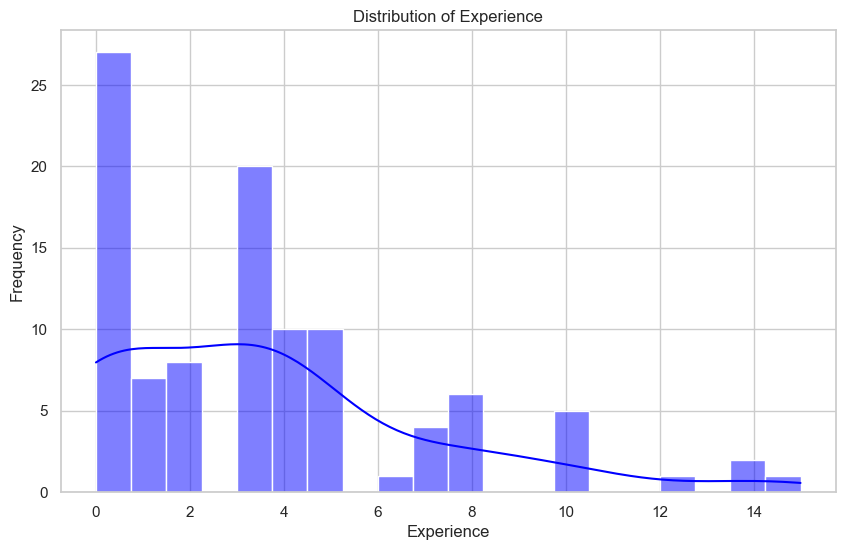

C:\Users\Admin\AppData\Local\Temp\ipykernel_1732\1243153690.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Education Level'], palette='Set2')


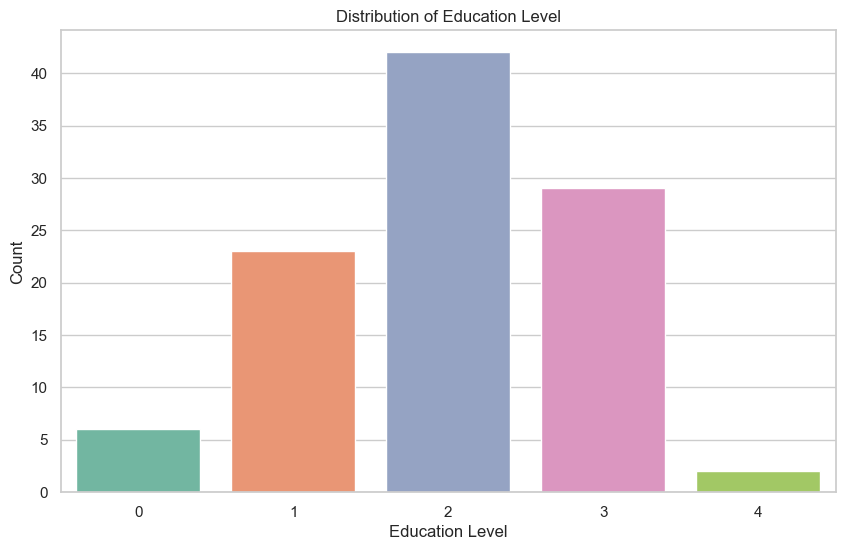

C:\Users\Admin\AppData\Local\Temp\ipykernel_1732\1243153690.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Job Level'], palette='Set3')


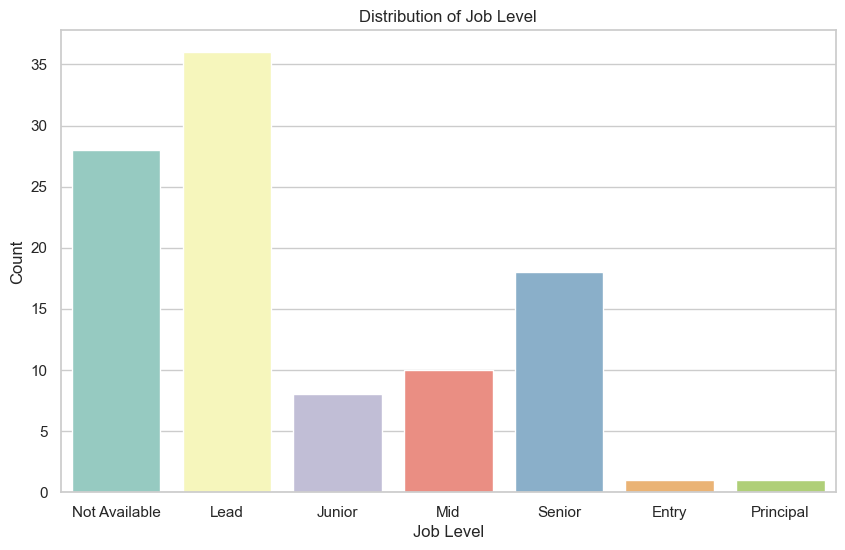

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Cài đặt cho đồ thị
sns.set(style="whitegrid")

# Phân phối Experience
plt.figure(figsize=(10, 6))
sns.histplot(df['Experience'], kde=True, color='blue', bins=20)
plt.title('Distribution of Experience')
plt.xlabel('Experience')
plt.ylabel('Frequency')
plt.show()

# Phân phối Education Level
plt.figure(figsize=(10, 6))
sns.countplot(x=df['Education Level'], palette='Set2')
plt.title('Distribution of Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

# Phân phối Job Level
plt.figure(figsize=(10, 6))
sns.countplot(x=df['Job Level'], palette='Set3')
plt.title('Distribution of Job Level')
plt.xlabel('Job Level')
plt.ylabel('Count')
plt.show()


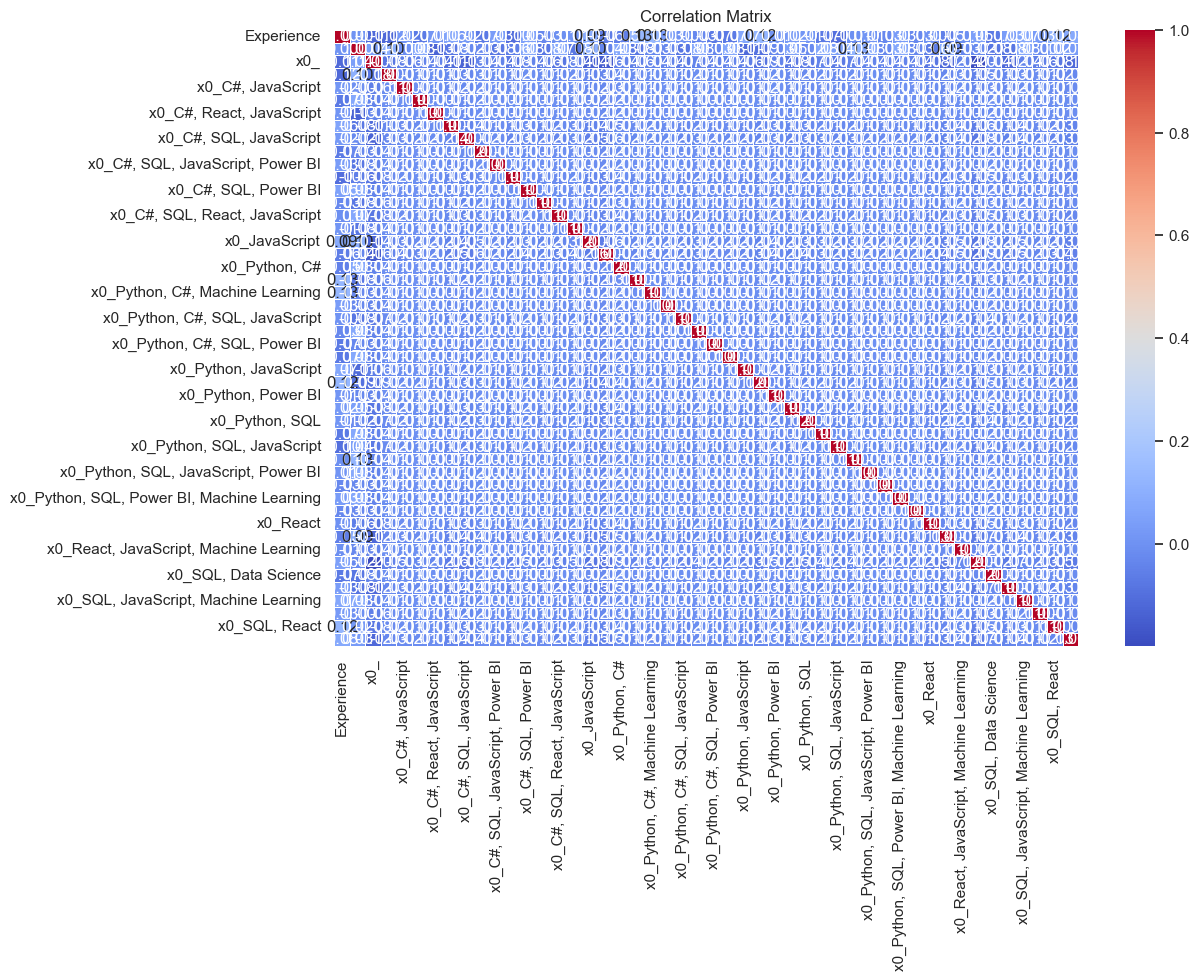

In [11]:
# Tính toán ma trận tương quan
corr_matrix = X.corr()

# Vẽ heatmap của ma trận tương quan
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [37]:
df = pd.read_csv('data_cleaned.csv')

In [39]:
# Loại bỏ các hàng có giá trị Salary là NaN
df = df.dropna(subset=['Salary'])

# Reset lại index và loại bỏ cột index cũ
df = df.reset_index(drop=True)


In [40]:
df

Job Title  \
0                          MS Power Platform Developer   
1                   CBT Developer w active TS/SCI Poly   
2                                   Software Developer   
3                         Software Developer - Angular   
4    Email Developer and Automation Specialist, Hom...   
..                                                 ...   
97                    OT Applications System Developer   
98   Dev10 Entry Level Software Developer - Nationwide   
99                            Web Developer I - 525281   
100  Adjunct Faculty Non-Instructional Course Devel...   
101  Developer in Test II - Core Enterprise Data an...   

                             Job Skills Required  \
0                         ['Python', 'Power BI']   
1                                             []   
2                                        ['SQL']   
3                                             []   
4                                        ['SQL']   
..                                           ...   
97           ['Python', 'C#', 'SQL', 'Power BI']   
98                                            []   
99                ['SQL', 'React', 'JavaScript']   
100                                           []   
101  ['Python', 'SQL', 'JavaScript', 'Power BI']   

                                       Job Description    Salary  Experience  \
0    Description\n\nLeidos currently has an opening...   81250.0         4.0   
1    Description\n\nLooking for a rewarding career ...   78000.0         8.0   
2    Job Description\n\nBAE Systems is looking for ...     862.0         0.0   
3    Software Developer - AngularJob Category: Info...   94400.0         NaN   
4    Job Description\n\nCoStar Group Intro\n\nCoSta...   94000.0         NaN   
..                                                 ...       ...         ...   
97   Primary Purpose\n\nJOB DESCRIPTION\n\nThe prim...  109350.0         0.0   
98   Please submit a formal application through our...     600.0         2.0   
99   Pay Grade/Pay Range: Minimum: $48,600 - Midpoi...   48600.0         0.0   
100  Adjunct Faculty Non-Instructional Course Devel...   68000.0         0.0   
101  Company Description\n\n“We’re not in the shipp...  100000.0         4.0   

                Job Group      Job Level Education Level  
0    Software Development  Not Available          Degree  
1    Software Development  Not Available          Degree  
2    Software Development  Not Available          Degree  
3    Software Development           Lead       Associate  
4    Software Development           Lead          Degree  
..                    ...            ...             ...  
97   Software Development            Mid          Degree  
98   Software Development         Senior      Bachelor's  
99        Web Development            Mid      Bachelor's  
100  Software Development            Mid      Bachelor's  
101          Data Science           Lead   Not Available  

[102 rows x 8 columns]

C:\Users\Admin\AppData\Local\Temp\ipykernel_1732\2770039567.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Salary'].fillna(df['Salary'].mean(), inplace=True)  # Điền giá trị trung bình cho lương
C:\Users\Admin\AppData\Local\Temp\ipykernel_1732\2770039567.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are settin

MAE: 245090.7904142857
MSE: 930539259040.548
R2 Score: -964.4328687920216


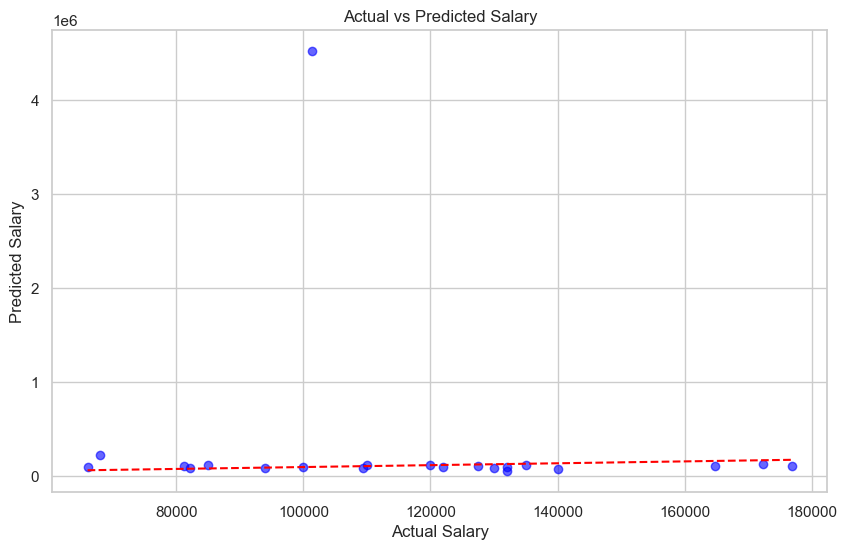

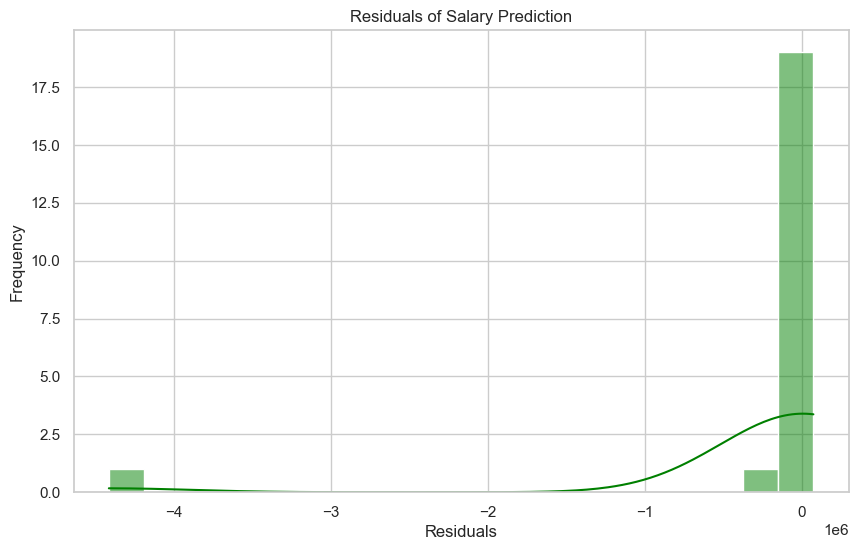

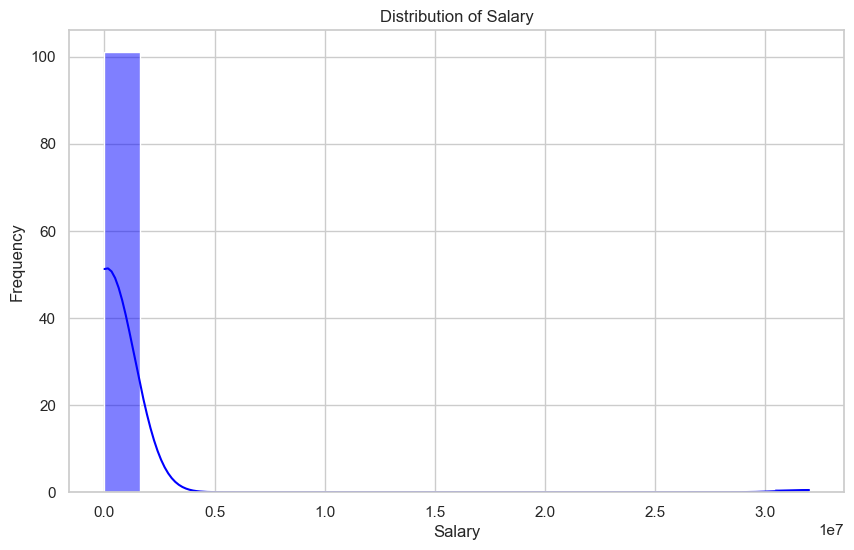

C:\Users\Admin\AppData\Local\Temp\ipykernel_1732\2770039567.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette='viridis')


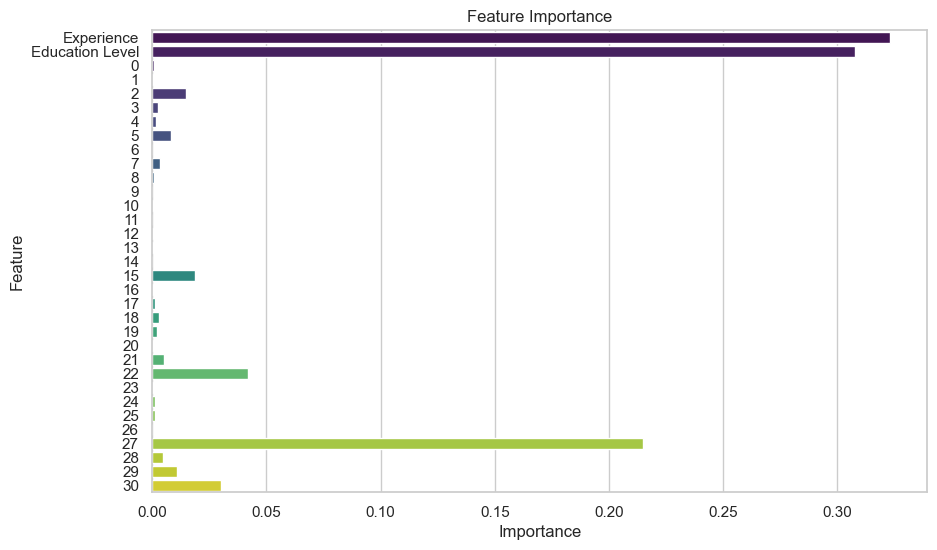

In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Giả sử df là DataFrame của bạn đã được xử lý trước
# df = pd.read_csv('data_cleaned.csv')  # Đọc dữ liệu nếu chưa có

# Xử lý dữ liệu
df['Salary'].fillna(df['Salary'].mean(), inplace=True)  # Điền giá trị trung bình cho lương
df['Experience'].fillna(df['Experience'].mean(), inplace=True)
df['Education Level'].fillna('Unknown', inplace=True)

# Mã hóa Education Level
edu_encoder = LabelEncoder()
df['Education Level'] = edu_encoder.fit_transform(df['Education Level'])

# Mã hóa kỹ năng (giả sử cột 'Job Skills Required' chứa các kỹ năng được phân tách bởi dấu phẩy)
# Mã hóa kỹ năng
skills_encoder = OneHotEncoder(handle_unknown='ignore')
skills = skills_encoder.fit_transform(df['Job Skills Required'].values.reshape(-1, 1))


# Kết hợp dữ liệu (Chuyển đổi thành dạng array nếu cần)
X = pd.concat([df[['Experience', 'Education Level']], pd.DataFrame(skills.toarray())], axis=1)
y = df['Salary']

# Đảm bảo rằng tất cả tên cột đều là kiểu chuỗi (string)
X.columns = X.columns.astype(str)

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Huấn luyện mô hình RandomForestRegressor
reg = RandomForestRegressor(random_state=42)
reg.fit(X_train, y_train)

# Đánh giá mô hình
y_pred = reg.predict(X_test)
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))

# Trực quan hóa kết quả

# 1. So sánh giá trị thực tế và giá trị dự đoán
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Đường chéo
plt.title('Actual vs Predicted Salary')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.show()

# 2. Sai số dự đoán (Residuals)
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='green', bins=20)
plt.title('Residuals of Salary Prediction')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# 3. Phân phối của Lương (Salary)
plt.figure(figsize=(10, 6))
sns.histplot(df['Salary'], kde=True, color='blue', bins=20)
plt.title('Distribution of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

# 4. Trực quan hóa đặc trưng quan trọng (Feature Importance)
importances = reg.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [42]:
df2 = pd.read_csv('jobs_data_extracted_2.csv')

In [44]:
# Loại bỏ các hàng có giá trị Salary là NaN
df2 = df2.dropna(subset=['Salary'])

# Reset lại index và loại bỏ cột index cũ
df2 = df2.reset_index(drop=True)


In [45]:
df2

Title  \
0                     Web Developer (Remote)   
1                              Web Developer   
2                              Web Developer   
3                Web Developer - Entry Level   
4                              Web Developer   
..                                       ...   
126                            Web Developer   
127              Web Developer - Entry Level   
128                            Web Developer   
129                            Web Developer   
130  Junior Drupal Web Developer (Part-time)   

                              Company         Location  \
0               Fusion Technology LLC    United States   
1                  Cornell University    United States   
2    Virginia Commonwealth University     Richmond, VA   
3                       Hardin Design      Madison, WI   
4                          McCrometer        Hemet, CA   
..                                ...              ...   
126  Virginia Commonwealth University     Richmond, VA   
127                     Hardin Design      Madison, WI   
128                    Demme Learning  Rohrerstown, PA   
129                        McCrometer        Hemet, CA   
130  American Institutes for Research    Rockville, MD   

                                           Description    Posted Date  \
0    Fusion Enterprise Solutions is in search for a...  Not Available   
1    Web Developer (Remote) *No Visa Sponsorship of...  Not Available   
2    Web Developer\n\nBenefits of working at VCU\n\...  Not Available   
3    Company Description\n\nAt Hardin Design & Deve...  Not Available   
4    McCrometer (www.mccrometer.com) is a global le...  Not Available   
..                                                 ...            ...   
126  Web Developer\n\nBenefits of working at VCU\n\...  Not Available   
127  Company Description\n\nAt Hardin Design & Deve...  Not Available   
128  GENERAL ROLE DESCRIPTION\n\nWorking from estab...  Not Available   
129  McCrometer (www.mccrometer.com) is a global le...  Not Available   
130  Overview\n\nJoin AIR as a part-time Junior Dru...  Not Available   

             Salary  Experience Salary_Raw      Salary Range  
0          135000.0           1   $135,000  (135000, 140000)  
1           70556.0           1          2                 2  
2           75000.0           1        242               242  
3           55000.0           1       500               500   
4    (70000, 90000)           1         $5    (70000, 90000)  
..              ...         ...        ...               ...  
126         75000.0           1        242               242  
127         55000.0           1       500               500   
128         33000.0           1         40    (33000, 49500)  
129  (70000, 90000)           1         $5    (70000, 90000)  
130             194           1        194               194  

[131 rows x 9 columns]

Xử lý những Salary bất thường/vô lý

Phân tích độ dài thích hợp cho dữ liệu

Xử lý dữ liệu thiếu

In [71]:
import pandas as pd
import os

# Đường dẫn tới thư mục chứa các tệp CSV
data_folder = "data"  # Thay bằng đường dẫn thư mục của bạn

# Danh sách các cột cần thiết cho dự đoán lương
required_columns = [
    'ConvertedCompYearly',  # Lương đã được quy đổi
    'YearsCodePro',         # Số năm kinh nghiệm lập trình
    'Country',              # Quốc gia
    'EdLevel',              # Trình độ học vấn
    'DevType',              # Vai trò công việc
    'Employment',           # Hình thức làm việc
]

# Tạo một DataFrame rỗng để chứa kết quả
combined_data = pd.DataFrame()
year = 2020
# Lặp qua tất cả các tệp CSV trong thư mục
for file_name in os.listdir(data_folder):
    year +=1
    if file_name.endswith(".csv"):  # Chỉ xử lý tệp CSV
        file_path = os.path.join(data_folder, file_name)
        print(f"Đang xử lý tệp: {file_name}")

        # Đọc dữ liệu từ tệp CSV
        data = pd.read_csv(file_path)

        # Lọc các cột cần thiết
        filtered_data = data[[col for col in required_columns if col in data.columns]]

        # Kiểm tra dữ liệu còn lại
        if filtered_data.empty:
            print(f"Tệp {file_name} không có cột phù hợp, bỏ qua.")
            continue

        # Lấy ngẫu nhiên tối đa 1000 dòng từ dữ liệu đã lọc
        sampled_data = filtered_data.sample(n=min(1000, len(filtered_data)), random_state=42)

        sampled_data['Year'] = year

        # Gộp dữ liệu đã lấy mẫu vào DataFrame tổng hợp
        combined_data = pd.concat([combined_data, sampled_data], ignore_index=True)

print("Đã gộp dữ liệu từ tất cả các tệp.")
print(f"DataFrame cuối cùng có {len(combined_data)} dòng.")


Đang xử lý tệp: survey_results_public_2021.csv
Đang xử lý tệp: survey_results_public_2022.csv
Đang xử lý tệp: survey_results_public_2023.csv
Đang xử lý tệp: survey_results_public_2024.csv
Đã gộp dữ liệu từ tất cả các tệp.
DataFrame cuối cùng có 4000 dòng.


In [72]:
combined_data.to_csv('FINAL_DATA.csv', index=False)

In [73]:
combined_data

ConvertedCompYearly      YearsCodePro                   Country  \
0                 50268.0                 7                     India   
1                 92450.0                 9                    Brazil   
2                     NaN  Less than 1 year                    Mexico   
3                  9228.0                 1                  Malaysia   
4                135000.0                 2  United States of America   
...                   ...               ...                       ...   
3995              82458.0                 6                    Norway   
3996                  NaN               NaN                Bangladesh   
3997              55285.0                16                    Sweden   
3998               2088.0                 2                     Spain   
3999             164000.0                10  United States of America   

                                                EdLevel  \
0          Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
1          Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
2     Some college/university study without earning ...   
3       Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
4          Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
...                                                 ...   
3995    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
3996  Some college/university study without earning ...   
3997    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
3998    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
3999    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   

                                                DevType  \
0     Developer, front-end;Developer, desktop or ent...   
1                 Developer, mobile;Academic researcher   
2     Developer, desktop or enterprise applications;...   
3                                     Developer, mobile   
4                                     Developer, mobile   
...                                                 ...   
3995                              Developer, full-stack   
3996                              Developer, full-stack   
3997                                Developer, back-end   
3998                        Research & Development role   
3999                        Developer, game or graphics   

                                             Employment  Year  
0                                    Employed full-time  2021  
1     Independent contractor, freelancer, or self-em...  2021  
2                                    Employed part-time  2021  
3                                    Employed full-time  2021  
4                                    Employed full-time  2021  
...                                                 ...   ...  
3995                                Employed, full-time  2024  
3996             Student, full-time;Employed, part-time  2024  
3997  Independent contractor, freelancer, or self-em...  2024  
3998                                Employed, full-time  2024  
3999                                Employed, full-time  2024  

[4000 rows x 7 columns]

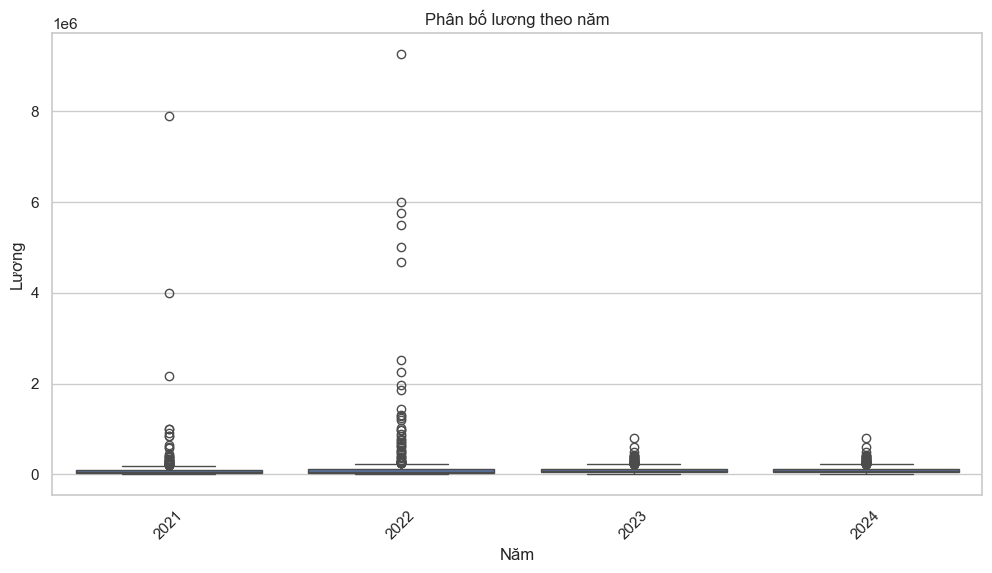

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data=combined_data, x='Year', y='ConvertedCompYearly')
plt.title('Phân bố lương theo năm')
plt.xlabel('Năm')
plt.ylabel('Lương')
plt.xticks(rotation=45)
plt.show()
